In [36]:
import dplpy as dpl
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas
from csaps import csaps
import capsf
random.seed(4576)

In [29]:
data = dpl.readers("../tests/data/rwl/co021.rwl")
data


Attempting to read input file: co021.rwl as .rwl format


SUCCESS!
File read as: .rwl file



,641114,641121,641132,641143,642114,642121,642143,642211,642222,642233,...,645214,645221,645232,645243,646107,646118,646211,646222,646233,646244
Year,,,,,,,,,,,,,,,,,,,,,
1176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.42,NaN,NaN,NaN,NaN
1177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.37,NaN,NaN,NaN,NaN
1178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.39,NaN,NaN,NaN,NaN
1179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.33,NaN,NaN,NaN,NaN
1180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.52,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960,0.32,0.26,0.31,0.30,0.18,0.23,0.28,0.49,0.54,0.36,...,0.32,0.34,NaN,0.42,NaN,NaN,0.51,0.47,0.42,0.33
1961,0.17,0.22,0.26,0.21,0.18,0.17,0.19,0.38,0.39,0.17,...,0.18,0.18,NaN,0.20,NaN,NaN,0.24,0.20,0.20,0.18
1962,0.21,0.21,0.17,0.18,0.13,0.16,0.22,0.13,0.20,0.14,...,0.13,0.15,NaN,0.13,NaN,NaN,0.19,0.20,0.17,0.12


In [30]:
data_sum = dpl.summary(data)
data_sum

,641114,641121,641132,641143,642114,642121,642143,642211,642222,642233,...,645214,645221,645232,645243,646107,646118,646211,646222,646233,646244
count,695.000000,715.000000,709.000000,728.000000,722.000000,705.000000,761.000000,551.000000,515.000000,555.000000,...,504.000000,475.00000,195.000000,437.000000,749.000000,226.000000,496.000000,305.000000,437.000000,482.000000
mean,0.301165,0.341357,0.370465,0.356937,0.294543,0.326752,0.385664,0.379074,0.432311,0.456901,...,0.408571,0.46320,0.998769,0.437757,0.364700,0.752611,0.519476,0.354328,0.555332,0.561950
std,0.434320,0.479543,0.494384,0.458279,0.422540,0.553137,0.485684,0.526259,0.537420,0.545789,...,0.585707,0.65083,0.912416,0.595749,0.434918,0.712596,0.626542,0.597726,0.671272,0.659981
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.160000,0.170000,0.200000,0.190000,0.170000,0.130000,0.170000,0.150000,0.190000,0.190000,...,0.130000,0.17000,0.515000,0.170000,0.190000,0.432500,0.180000,0.130000,0.210000,0.212500
50%,0.230000,0.260000,0.290000,0.270000,0.240000,0.210000,0.270000,0.280000,0.360000,0.350000,...,0.270000,0.30000,0.830000,0.320000,0.300000,0.680000,0.370000,0.300000,0.400000,0.410000
75%,0.330000,0.360000,0.400000,0.400000,0.320000,0.320000,0.440000,0.480000,0.540000,0.610000,...,0.480000,0.53000,1.295000,0.530000,0.430000,0.930000,0.710000,0.480000,0.640000,0.730000
max,9.990000,9.990000,9.990000,9.990000,9.990000,9.990000,9.990000,9.990000,9.990000,9.990000,...,9.990000,9.99000,9.990000,9.990000,9.990000,9.990000,9.990000,9.990000,9.990000,9.990000


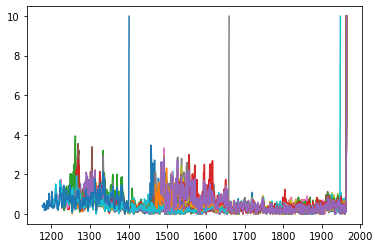

In [21]:
plt.plot(data)
# https://python-graph-gallery.com/124-spaghetti-plot spaghetti plot tutorial

In [37]:
# i = np.random.choice(data[1])
rwl60 = capsf(data, 60, 1)

TypeError: 'module' object is not callable